# Surrounded Regions
You are given an `m x n` matrix `board` containing letters `'X'` and `'O'`, capture regions that are surrounded:
- Connect: A cell is connected to adjacent cells horizontally or vertically.
- Region: To form a region connect every `'O'` cell.
- Surround: The region is surrounded with `'X'` cells if you can connect the region with `'X'` cells and none of the region cells are on the edge of the `board`.

To capture a surrounded region, replace all `'O'`s with `'X'`s in-place within the original board. You do not need to return anything.

# Examples
**Example 1:**

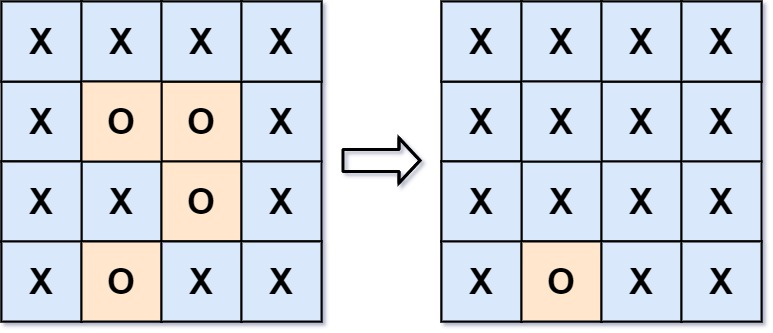
```
Input: board = [["X","X","X","X"],["X","O","O","X"],["X","X","O","X"],["X","O","X","X"]]
Output: [["X","X","X","X"],["X","X","X","X"],["X","X","X","X"],["X","O","X","X"]]
```
Explanation: In the above diagram, the bottom region is not captured because it is on the edge of the board and cannot be surrounded.

**Example 2:**
```
Input: board = [["X"]]
Output: [["X"]]
```

In [1]:
class Solution:

    def solve(self, board: list[list[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        m = len(board)
        n = len(board[0])

        visited = [[False] * n for _ in range(m)]

        def dfs(i, j):
            if (
                i < 0
                or i >= m
                or j < 0
                or j >= n
                or board[i][j] != "O"
                or visited[i][j]
            ):
                return
            visited[i][j] = True
            for direction in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                dfs(i + direction[0], j + direction[1])

        for j in range(n):
            dfs(0, j)
            dfs(m - 1, j)

        for i in range(1, m - 1):
            dfs(i, 0)
            dfs(i, n - 1)

        for i in range(1, m - 1):
            for j in range(1, n - 1):
                if not visited[i][j] and board[i][j] == "O":
                    board[i][j] = "X"

In [ ]:
class Solution:

    def solve(self, board: list[list[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        m = len(board)
        n = len(board[0])

        visited = set()

        def dfs(i, j):
            if (
                i < 0
                or i >= m
                or j < 0
                or j >= n
                or board[i][j] != "O"
                or (i, j) in visited
            ):
                return
            visited.add((i, j))
            for direction in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                dfs(i + direction[0], j + direction[1])

        for j in range(n):
            dfs(0, j)
            dfs(m - 1, j)

        for i in range(1, m - 1):
            dfs(i, 0)
            dfs(i, n - 1)

        for i in range(1, m - 1):
            for j in range(1, n - 1):
                if (i, j) not in visited and board[i][j] == "O":
                    board[i][j] = "X"

In [ ]:
'''
    Space Complexity: O(1)
'''

class Solution:

    def solve(self, board: list[list[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        m = len(board)
        n = len(board[0])

        def dfs(i, j, origin, target):
            if i < 0 or j < 0 or i >= m or j >= n or board[i][j] != origin:
                return
            board[i][j] = target
            for direction in [(i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)]:
                dfs(direction[0], direction[1], origin, target)

        def traverse_boundary(origin, target):
            for j in range(n):
                dfs(0, j, origin, target)
                dfs(m - 1, j, origin, target)
            for i in range(1, m - 1):
                dfs(i, 0, origin, target)
                dfs(i, n - 1, origin, target)

        traverse_boundary("O", "1")
        for i in range(m):
            for j in range(n):
                if board[i][j] == "O":
                    board[i][j] = "X"
                if board[i][j] == "1":
                    board[i][j] = "O"